In [98]:
pip install citipy

In [99]:
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [111]:
#Create some variables


output_file = "weather_data.csv"

lat_lngs = []
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities and len(cities) < 550:
        cities.append(city)
        
len(cities)

550

In [112]:
cities[0]

'busselton'

In [126]:
#Creating the API loop to create our lists

url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key = "acf83678340ce5afec12d701bcdfc3c3"
units = "imperial"

town = []
latitutde = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
hemisphere = []


for city in cities:
    try:
        query_url = f"{url}{city}&appid={api_key}&units={units}"
        response = requests.get(query_url).json()
        town.append(response['name'])
        latitutde.append(response['coord']["lat"])
        longitude.append(response['coord']["lon"])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        if response['coord']["lat"] > 0:
            hemisphere.append("Northern")
        else:
            hemisphere.append("Southern")

        print(f"Record {cities.index(city) + 1} found! | {response['name']}")
    except Exception as ex:
        print(f"Record {cities.index(city) + 1} not found.")
        pass


Record 1 found! | Busselton
Record 2 found! | Cidreira
Record 3 found! | Yellowknife
Record 4 found! | Ushuaia
Record 5 found! | Okakarara
Record 6 found! | Pevek
Record 7 found! | Rikitea
Record 8 found! | Saint Paul Harbor
Record 9 found! | Thompson
Record 10 found! | Mar del Plata
Record 11 found! | Faanui
Record 12 found! | Puerto Ayora
Record 13 found! | Staszów
Record 14 found! | Barrow
Record 15 found! | New Norfolk
Record 16 found! | Hermanus
Record 17 found! | Laas
Record 18 found! | Vaini
Record 19 found! | Atuona
Record 20 found! | Waipawa
Record 21 found! | Hilo
Record 22 found! | Nikolskoye
Record 23 found! | Labuhan
Record 24 found! | Linguère
Record 25 found! | Clyde River
Record 26 found! | Albany
Record 27 found! | Dalby
Record 28 found! | Ternate
Record 29 not found.
Record 30 found! | Saint-Philippe
Record 31 found! | Punta Arenas
Record 32 found! | Port Elizabeth
Record 33 found! | Honningsvåg
Record 34 found! | Maceió
Record 35 found! | Alofi
Record 36 found! | Kas

Record 289 found! | Yumen
Record 290 found! | Carutapera
Record 291 found! | San-Pédro
Record 292 found! | Roebourne
Record 293 found! | Saldanha
Record 294 found! | Yulara
Record 295 found! | Koslan
Record 296 not found.
Record 297 found! | Ballina
Record 298 found! | Constitución
Record 299 found! | Ghanzi
Record 300 found! | Guerrero Negro
Record 301 found! | Shimoda
Record 302 found! | Nānākuli
Record 303 found! | Aswān
Record 304 found! | Ellenabad
Record 305 found! | Airai
Record 306 found! | Royan
Record 307 found! | Soc Trang
Record 308 found! | Praia da Vitória
Record 309 found! | Dunda
Record 310 found! | Canmore
Record 311 found! | Poltava
Record 312 found! | Boyolangu
Record 313 found! | Los Llanos de Aridane
Record 314 not found.
Record 315 found! | Cayenne
Record 316 found! | Dunedin
Record 317 found! | Wattegama
Record 318 found! | Warri
Record 319 not found.
Record 320 found! | Kamaishi
Record 321 found! | Kula
Record 322 found! | Ostrovnoy
Record 323 found! | Henties B

In [132]:
#Create a dataframe
dict = {"City": town, "Latitude": latitutde, "Longitude": longitude, "Temperature": temperature, "Humidity": humidity, "Cloudiness": cloudiness, "Wind_Speed": wind_speed, "Hemisphere": hemisphere}

weather_data = pd.DataFrame(dict)

weather_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,Hemisphere
0,Busselton,-33.65,115.33,52.79,52,0,12.15,Southern
1,Cidreira,-30.18,-50.21,66.56,86,100,19.62,Southern
2,Yellowknife,62.46,-114.35,23.00,85,90,9.17,Northern
3,Ushuaia,-54.80,-68.30,48.20,61,75,21.92,Southern
4,Okakarara,-20.58,17.43,94.57,10,45,11.63,Southern


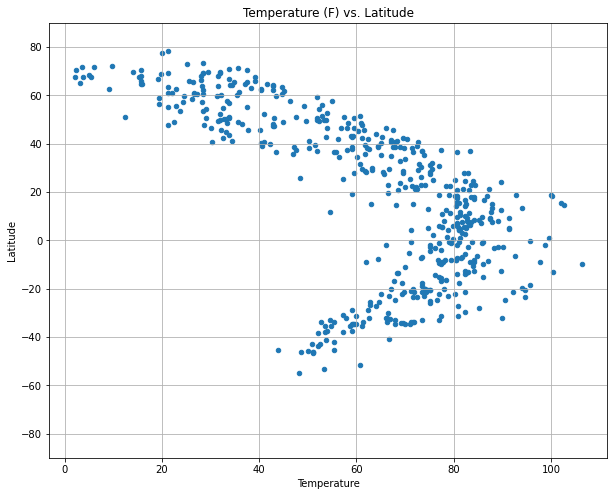

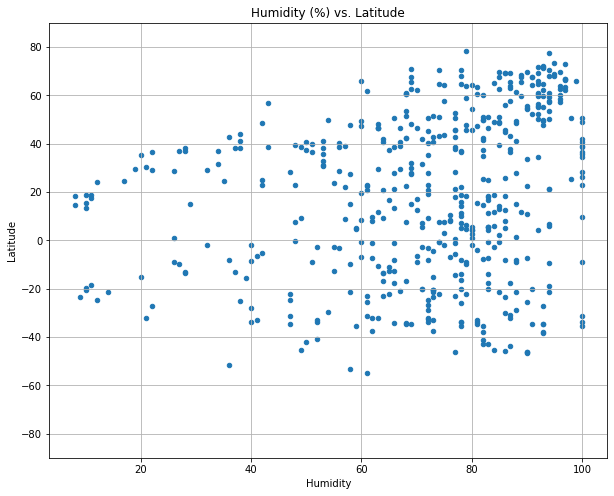

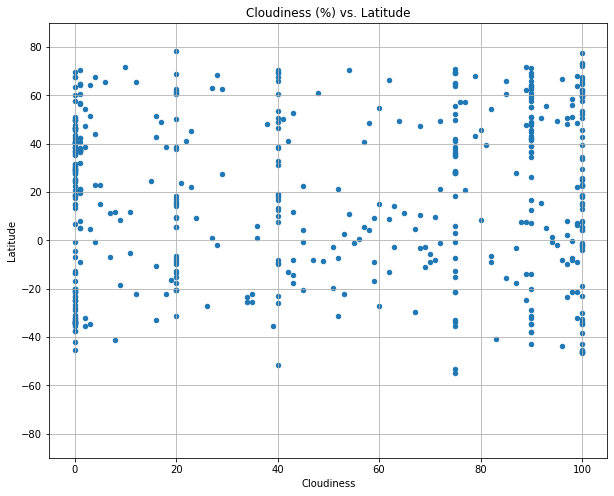

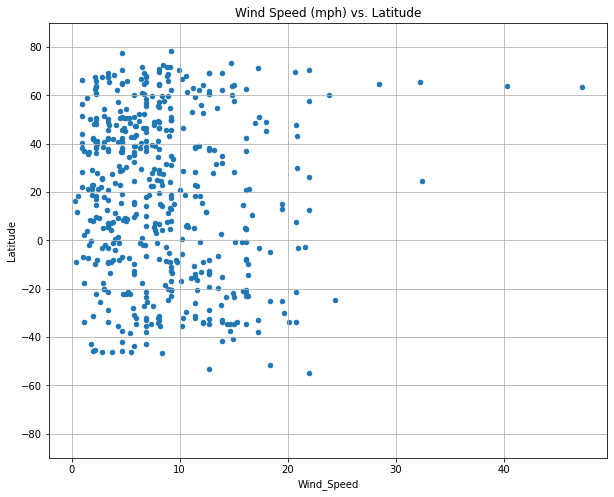

In [139]:
#Create the scatter plot comparisons

weather_data.plot(kind="scatter", x="Temperature", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Temperature (F) vs. Latitude")
weather_data.plot(kind="scatter", x="Humidity", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Humidity (%) vs. Latitude")
weather_data.plot(kind="scatter", x="Cloudiness", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Cloudiness (%) vs. Latitude")
weather_data.plot(kind="scatter", x="Wind_Speed", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Wind Speed (mph) vs. Latitude")
plt.show()